# K Nearest Neighbor 

или k Ближайших Соседей — это один из самых простых алгоритмов классификации.

### Алгоритм

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:

* Вычислить расстояние до каждого из объектов обучающей выборки

* Отобрать k объектов обучающей выборки, расстояние до которых минимально

* Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди k ближайших соседей

In [32]:
import numpy as np
import pandas as pd
import pylab as pl
import math
import random

Для решения данной задачи нам потребуется задать начальные
данные в качестве обучающей выборке. Это можно сделать тремя
способами:

1) взять точки на плоскости и решать для них задачу кластеризации
одним из способов выше;

2) взять какой-то набор данных из интернета и работать с ним;

3) использовать следующий код для случайного задания этой выборки

In [33]:
# Сгенерируем данные, на которых будут производиться эксперименты
def generateData (numberOfClassEl, numberOfClasses):
    data = []
    for classNum in range(numberOfClasses):
# Выбрать случайный центр двумерного гаусса
        centerX, centerY = random.random()*5.0, random.random()*5.0
        for rowNum in range(numberOfClassEl):
            data.append([ [random.gauss(centerX, 0.5), random.gauss(centerY, 0.5)], classNum ])
    return data

# Для простоты выбрано двумерное пространство, в котором случайным образом на участке от 0 до 5 по каждой из осей 
# выбирается местоположение мат.ожидания двумерного гауссиана со среднеквадратичным отклонением 0.5. 
# Значение 0.5 выбрано, чтобы объекты оказались достаточно хорошо разделимыми (правило трех сигм).

In [57]:
from matplotlib.colors import ListedColormap

def showData (nClasses, nItemsInClass):
    trainData      = generateData (nItemsInClass, nClasses)
    classColormap  = ListedColormap(['#FF0000', '#00FF00', '#2036f7'])
    pl.scatter([trainData[i][0][0] for i in range(len(trainData))],
               [trainData[i][0][1] for i in range(len(trainData))],
               c=[trainData[i][1] for i in range(len(trainData))],
               cmap=classColormap)
    pl.show()   

In [35]:
# Теперь нам нужно разбить это множество на две части: обучающую выбору и тестовую выборку
def splitTrainTest (data, testPercent):
    trainData = []
    testData  = []
    for row in data:
        if random.random() < testPercent:
            testData.append(row)
        else:
            trainData.append(row)
    return trainData, testData

In [36]:
# Евклидово расстояние между 2 точками
def dist (a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

In [37]:
# Реализация классификатора
def classifyKNN (trainData, testData, k, numberOfClasses):
    testLabels = []
    for testPoint in testData:
        # Рассчитать расстояние между test point и всеми train points
        testDist = [ [dist(testPoint, trainData[i][0]), trainData[i][1]] for i in range(len(trainData))]
        # Сколько points каждого класса среди ближайших K
        stat = [0 for i in range(numberOfClasses)]
        for d in sorted(testDist)[0:k]:
            stat[d[1]] += 1
        # Назначить класс с наибольшим количеством вхождений среди K ближайших соседей
        testLabels.append( sorted(zip(stat, range(numberOfClasses)), reverse=True)[0][1] )
    return testLabels

In [54]:
# Визуализация
def showDataOnMesh (nClasses, nItemsInClass, k):
    # Создание сетки узлов, охватывающую все случаи train
    def generateTestMesh (trainData):
        x_min = min( [trainData[i][0][0] for i in range(len(trainData))] ) - 1.0
        x_max = max( [trainData[i][0][0] for i in range(len(trainData))] ) + 1.0
        y_min = min( [trainData[i][0][1] for i in range(len(trainData))] ) - 1.0
        y_max = max( [trainData[i][0][1] for i in range(len(trainData))] ) + 1.0
        h = 0.05
        testX, testY = np.meshgrid(np.arange(x_min, x_max, h),
                                   np.arange(y_min, y_max, h))
        return [testX, testY]
    trainData      = generateData (nItemsInClass, nClasses)
    testMesh       = generateTestMesh (trainData)
    testMeshLabels = classifyKNN (trainData, zip(testMesh[0].ravel(), testMesh[1].ravel()), k, nClasses)
    classColormap  = ListedColormap(['#FF0000', '#00FF00', '#2036f7'])
    testColormap   = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAAA'])
    pl.pcolormesh(testMesh[0],
                  testMesh[1],
                  np.asarray(testMeshLabels).reshape(testMesh[0].shape),
                  cmap=testColormap)
    pl.scatter([trainData[i][0][0] for i in range(len(trainData))],
               [trainData[i][0][1] for i in range(len(trainData))],
               c=[trainData[i][1] for i in range(len(trainData))],
               cmap=classColormap)
    pl.show()

In [55]:
nClasses = 3
nItemInClass = 40
testPercent = 0.01
k = 10

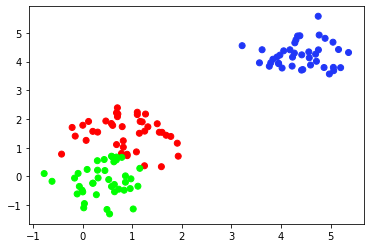

In [60]:
showData(nClasses, nItemInClass)

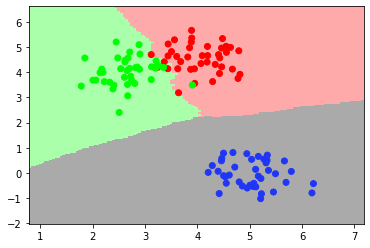

In [61]:
showDataOnMesh(nClasses, nItemInClass, k)

In [62]:
data = generateData(nItemInClass,nClasses)
trainData, testDataWithLabels = splitTrainTest(data, testPercent)
testData = [testDataWithLabels[i][0] for i in range(len(testDataWithLabels))]

In [63]:
# Оценка, насколько хорошо работает классификатор
def calculateAccuracy (nClasses, nItemsInClass, k, testPercent):
    data = generateData(nItemInClass, nClasses)
    trainData, testDataWithLabels = splitTrainTest(data, testPercent)
    testData = [testDataWithLabels[i][0] for i in range(len(testDataWithLabels))]
    testDataLabels = classifyKNN(trainData, testData, k, nClasses)
    print ("Точность: ", sum([int(testDataLabels[i]==testDataWithLabels[i][1]) for i in range(len(testDataWithLabels))]) / float(len(testDataWithLabels)))

# сгенерируем данные, разобьем их на обучающую и тестовую выборку, произведем классификацию 
# объектов тестовой выборки и сравним реальное значение класса с полученным в результате классификации

In [64]:
calculateAccuracy(nClasses, nItemInClass, k, testPercent)

Точность:  1.0
